<a href="https://colab.research.google.com/github/benjamin-dinh/regression-models/blob/main/regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Model of Automobile Prices**

---


Built a regression model of the price of an automobile as a function of many of its attributes, e.g., weight, number of doors, engine location, etc. 

The data set comes from UCI dataset archive:
https://archive.ics.uci.edu/ml/datasets/Automobile


##  ***Regression in Python***

In [ ]:
import pandas as pd
import io

#import required packages
import numpy as np
from sklearn.metrics import mean_squared_error 
from math import sqrt

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from pandas.plotting import scatter_matrix

import seaborn as sns

In [ ]:
# load data
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
df = pd.read_csv(url)

# giving names to columns
df.columns = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

# Categorical Variables: make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, engine-type, num-of-cylinders, fuel-system

# remove rows with question marks
df = df[(df != '?').all(axis=1)]

# preview
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
10,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925
11,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2710,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
12,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2765,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105
17,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151
18,1,98,chevrolet,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6295


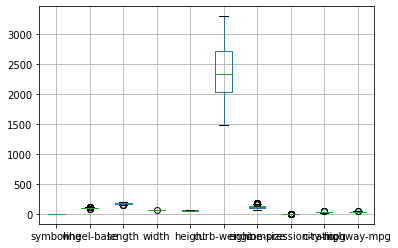

In [ ]:
df.columns

# df.describe(include = 'all')
# df.drop('curb-weight', axis=1).boxplot()
# df[['wheel-base']].boxplot()
# df[['length']].boxplot()
# df[['width']].boxplot()
# df[['height']].boxplot()
# df[['curb-weight']].boxplot()
# df[['engine-size']].boxplot()
# df[['compression-ratio']].boxplot()
# df[['city-mpg']].boxplot()
# df[['highway-mpg']].boxplot()

# get rid of outliers

from scipy import stats
# n_df = df[(np.abs(stats.zscore(df['curb-weight'])) < 2)]
# n_df = df[(np.abs(stats.zscore(df['curb-weight'])) < 2)]
# n_df[['curb-weight']].boxplot()

import numpy as np
df = df[(np.abs(stats.zscore(df['price'].astype(float))) < 2)]
# df['log-price'] = df['log-price'].apply(np.log)
df['compression-ratio'] = df['compression-ratio'].apply(np.log)
df.boxplot()

## **Model of Automobile Price Excluding Categorical Variables**

### Select the dependent variable, and independent variables of interest.

In [ ]:
Y = df[['price']].astype(float)

# Manual Forward Iteration Results (predictor, adj r^2)
# curb-weight, 0.737
# curb-weight, horsepower, 0.77
# curb-weight, horsepower, width, 0.79
# curb-weight, horsepower, width, normalized-losses, 0.80
# curb-weight, horsepower, width, normalized-losses, wheel-base, 0.813
# curb-weight, horsepower, width, normalized-losses, wheel-base, stroke, 0.817
# curb-weight, horsepower, width, normalized-losses, wheel-base, stroke, compression-ratio, 0.820
# curb-weight, horsepower, width, normalized-losses, wheel-base, stroke, compression-ratio, height, 0.82123
# curb-weight, horsepower, width, normalized-losses, wheel-base, stroke, compression-ratio, height, length, 0.82133

X = df[['normalized-losses','wheel-base','width','height','stroke','compression-ratio','horsepower']].astype(float)

###Build Model with statsmodels#

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# create the X matrix by appending a column of ones to X
X = sm.add_constant(X)

# check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = {name: variance_inflation_factor(X.values, i) for name, i in zip(X.columns, range(X.shape[1]))}
vif_df

{'compression-ratio': 1.3596550656178943,
 'const': 3952.279045390368,
 'height': 2.063429176886124,
 'horsepower': 2.5057487633512703,
 'normalized-losses': 1.378042100006844,
 'stroke': 1.0849311803843338,
 'wheel-base': 4.25472999921403,
 'width': 4.289649479258853}

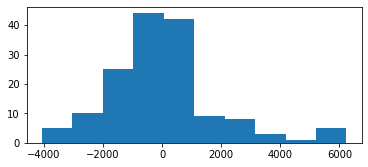

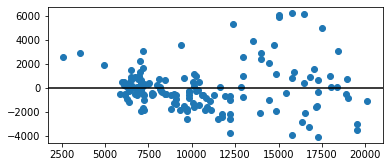

In [ ]:
model = sm.OLS(Y,X)
results_sm = model.fit()

pred_val = results_sm.fittedvalues.copy()
true_val = df['price'].astype(float).values.copy()
residual = true_val - pred_val

from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(6,2.5))
ax.hist(residual)
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(pred_val,residual)
plt.axhline(0, color='k')

### Summary of Best Model

In [ ]:
print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     95.22
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           8.09e-51
Time:                        01:24:15   Log-Likelihood:                -1362.1
No. Observations:                 152   AIC:                             2740.
Df Residuals:                     144   BIC:                             2764.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -5.91e+04   9882.31

### $R^2$ and adj. $R^2$ 

In [ ]:
print('R^2 =', results_sm.rsquared)
print('adj. R^2 =', results_sm.rsquared_adj)

R^2 = 0.8223477972317363
adj. R^2 = 0.8137119262638346


## **Top 3 Most Important Variables in Model**


### Important variables and the variance explained by each.

In [ ]:
Y = df[['price']].astype(float)
X = df[['normalized-losses','wheel-base','width','height','stroke','compression-ratio','horsepower']]
# Loop to look at all adj r^2 for each predictor
# for category in X:
#   X_category = df[[category]].astype(float)
#   var_results = sm.OLS(Y,X_category).fit()
#   print(var_results.summary(), '\n')

# Results from individual OLS (predictor, adj_r^2, p-value)
# normalized-losses, 0.839, 6.94e-62
# wheel-base, 0.871, 3.11e-69
# width, 0.862, 4.63e-67
# height, 0.855, 2.42e-65
# stroke, 0.841, 2.64e-62
# compression-ratio, 0.839, 6.61e-62
# horsepower, 0.943, 3.30e-96

X_horsepower = df[['horsepower']].astype(float)
X_width = df[['width']].astype(float)
X_wheel = df[['wheel-base']].astype(float)
horsepower_results = sm.OLS(Y,X_horsepower).fit()
width_results = sm.OLS(Y,X_width).fit()
wheel_results = sm.OLS(Y,X_wheel).fit()

# [variable_1_name, variance, p-value]
print('horsepower, variance = {variance}, p-value = {pvalue}'.format(variance=horsepower_results.rsquared_adj, pvalue=horsepower_results.pvalues[0]))

# [variable_2_name, variance, p-value]
print('wheel-base, variance = {variance}, p-value = {pvalue}'.format(variance=wheel_results.rsquared_adj, pvalue=wheel_results.pvalues[0]))

# [variable_3_name, variance, p-value]
print('width, variance = {variance}, p-value = {pvalue}'.format(variance=width_results.rsquared_adj, pvalue=width_results.pvalues[0]))

horsepower, variance = 0.9432729924577183, p-value = 3.30265154470019e-96
wheel-base, variance = 0.8709267555387493, p-value = 3.1104080680135436e-69
width, variance = 0.8620923532278991, p-value = 4.6319800287912644e-67


##**Interpretation of the Model in Regards to Top 3 Attributes**

1st predictor interpretation: The coefficient of the first predictor (horsepower) is 84.4795. Assuming all other predictors are held constant, this can be interpretted as for every horsepower increase, we expect an $84.4795 increase in price.

2nd predictor interpretation: The coefficient of the second predictor (wheel-base) is 274.4476. Assuming all other predictors are held constant, this can be interpretted as for every inch increase of the wheel-base, we expect a $274.4476 increase in price.

3rd predictor interpretation: The coefficient of the third predictor (width) is 347.1188. Assuming all other predictors are held constant, this can be interpretted as for every inch increase of the width, we expect a $347.1188 increase in price.

## **Model of Automobile Price Including Categorical Variables**

### Select the dependent variable, and independent variables of interest.

In [ ]:
# Categorical Variables: symboling, make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, engine-type, num-of-cylinders, fuel-system
df['symboling'] = df['symboling'].astype('category').cat.codes
df['make'] = df['make'].astype('category').cat.codes
df['fuel-type'] = df['fuel-type'].astype('category').cat.codes
df['aspiration'] = df['aspiration'].astype('category').cat.codes
df['num-of-doors'] = df['num-of-doors'].astype('category').cat.codes
df['body-style'] = df['body-style'].astype('category').cat.codes
df['drive-wheels'] = df['drive-wheels'].astype('category').cat.codes
df['engine-location'] = df['engine-location'].astype('category').cat.codes
df['engine-type'] = df['engine-type'].astype('category').cat.codes
df['num-of-cylinders'] = df['num-of-cylinders'].astype('category').cat.codes
df['fuel-system'] = df['fuel-system'].astype('category').cat.codes

# Check for outliers
# df.astype(float).boxplot()

# Manual Forward Iteration Results (predictor, adj r^2)
# curb-weight, 0.737
# curb-weight, horsepower, 0.77
# curb-weight, horsepower, wheel-base, 0.789
# curb-weight, horsepower, wheel-base, normalized-losses, 0.8065
# curb-weight, horsepower, wheel-base, normalized-losses, stroke, 0.8103
# curb-weight, horsepower, wheel-base, normalized-losses, stroke, compression-ratio, 0.8166
# curb-weight, horsepower, wheel-base, normalized-losses, stroke, compression-ratio, make, 0.82716
# curb-weight, horsepower, wheel-base, normalized-losses, stroke, compression-ratio, make, drive-wheels, 0.83114
# curb-weight, horsepower, wheel-base, normalized-losses, stroke, compression-ratio, make, drive-wheels, fuel-type, 0.83179
# curb-weight, horsepower, wheel-base, normalized-losses, stroke, compression-ratio, make, drive-wheels, fuel-type, aspiration, 0.835
# curb-weight, horsepower, wheel-base, normalized-losses, stroke, compression-ratio, make, drive-wheels, fuel-type, aspiration, fuel-systemm, 0.83725
# curb-weight, horsepower, wheel-base, normalized-losses, stroke, compression-ratio, make, drive-wheels, fuel-type, aspiration, fuel-systemm, width, 0.838
# curb-weight, horsepower, wheel-base, normalized-losses, stroke, compression-ratio, make, drive-wheels, fuel-type, aspiration, fuel-systemm, width, height, 0.83857
# curb-weight, horsepower, wheel-base, normalized-losses, stroke, compression-ratio, make, drive-wheels, fuel-type, aspiration, fuel-systemm, width, height, num-of-doors, 0.83868

Y = df[['price']].astype(float)
X = df[['horsepower','normalized-losses','stroke','compression-ratio','make','drive-wheels','aspiration','fuel-system','width','height','num-of-doors']].astype(float)

###Build Model with statsmodels#

In [ ]:
import statsmodels.api as sm

In [ ]:
# create the X matrix by appending a column of ones to X
X = sm.add_constant(X)

# check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = {name: variance_inflation_factor(X.values, i) for name, i in zip(X.columns, range(X.shape[1]))}
vif_df

{'aspiration': 1.3700779772256744,
 'compression-ratio': 1.68135671284137,
 'const': 3745.4214257007184,
 'drive-wheels': 1.7944428465731121,
 'fuel-system': 2.4819804672616876,
 'height': 1.5632460031103357,
 'horsepower': 4.054861786303168,
 'make': 1.7248338581512916,
 'normalized-losses': 2.088507410326366,
 'num-of-doors': 1.5270651988312567,
 'stroke': 1.2328464727164872,
 'width': 2.6416859054058914}

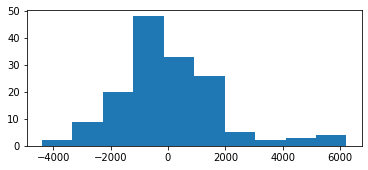

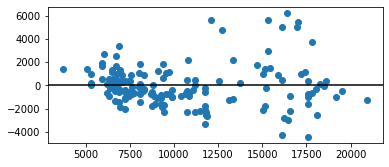

In [ ]:
model = sm.OLS(Y,X)
results_sm = model.fit()

pred_val = results_sm.fittedvalues.copy()
true_val = df['price'].astype(float).values.copy()
residual = true_val - pred_val

from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(6,2.5))
ax.hist(residual)
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(pred_val,residual)
plt.axhline(0, color='k')

### Summary of Best Model.

In [ ]:
print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     64.94
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           2.14e-49
Time:                        01:24:15   Log-Likelihood:                -1356.0
No. Observations:                 152   AIC:                             2736.
Df Residuals:                     140   BIC:                             2772.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6.141e+04   9370.56

### $R^2$ and adj. $R^2$ 

In [ ]:
print('R^2 =', results_sm.rsquared)
print('adj. R^2 =', results_sm.rsquared_adj)

R^2 = 0.8361307217641115
adj. R^2 = 0.8232552784741489


## **Polynomial Regression**

### Select the dependent variable, and independent variables of interest.

In [ ]:
Y = df[['price']].astype(float)

X = df[['horsepower','normalized-losses','stroke','compression-ratio','make','drive-wheels','aspiration','fuel-system','width','height','num-of-doors']].astype(float)
X['horsepower-sq'] = X[['horsepower']]**2
X['normalized-losses-sq'] = X[['normalized-losses']]**2
X['stroke-sq'] = X[['stroke']]**2
X['compression-ratio-sq'] = X[['compression-ratio']]**2
X['width-sq'] = X[['width']]**2
X['height-sq'] = X[['height']]**2
X = X[['horsepower','horsepower-sq','normalized-losses','normalized-losses-sq','stroke','stroke-sq','compression-ratio','compression-ratio-sq','make','drive-wheels','aspiration','fuel-system','width','width-sq','height','height-sq','num-of-doors']]

###Build Model with statsmodels#

In [ ]:
import statsmodels.api as sm

In [ ]:
# create the X matrix by appending a column of ones to X
X = sm.add_constant(X)
# check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = {name: variance_inflation_factor(X.values, i) for name, i in zip(X.columns, range(X.shape[1]))}
vif_df

{'aspiration': 2.3591085515818686,
 'compression-ratio': 835.5161407739263,
 'compression-ratio-sq': 853.5604704324282,
 'const': 1926176.9486515836,
 'drive-wheels': 2.0237839237131783,
 'fuel-system': 3.4759926393699523,
 'height': 1626.237831518457,
 'height-sq': 1609.3962183078231,
 'horsepower': 99.15830639403045,
 'horsepower-sq': 72.60230948076358,
 'make': 2.086350529660408,
 'normalized-losses': 40.658028193056595,
 'normalized-losses-sq': 37.662944719258974,
 'num-of-doors': 1.6532114208566264,
 'stroke': 228.22296209529105,
 'stroke-sq': 234.33656228979925,
 'width': 4012.8030017650576,
 'width-sq': 3959.5425270804158}

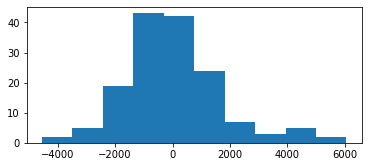

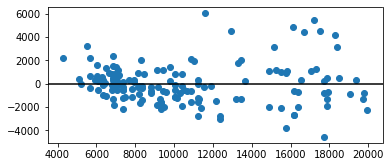

In [ ]:
model = sm.OLS(Y,X)
results_sm = model.fit()

pred_val = results_sm.fittedvalues.copy()
true_val = df['price'].astype(float).values.copy()
residual = true_val - pred_val

from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(6,2.5))
ax.hist(residual)

fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(pred_val,residual)
plt.axhline(0, color='k')

### Summary of Best Model

In [ ]:
print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     46.46
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           1.16e-47
Time:                        01:24:16   Log-Likelihood:                -1346.7
No. Observations:                 152   AIC:                             2729.
Df Residuals:                     134   BIC:                             2784.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.887e+05 

### $R^2$ and adj. $R^2$

In [ ]:
print('R^2 =', results_sm.rsquared)
print('adj. R^2 =', results_sm.rsquared_adj)

R^2 = 0.8549580499891907
adj. R^2 = 0.8365572055848343
